In [1]:
import pandas as pd
from sklearn import datasets
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt


iris = datasets.load_iris()

#Turning the dataset into a table
iris_data = pd.DataFrame(iris.data, columns=iris.feature_names)
iris_data["target"] = iris.target
iris_data.head()

# Making the names consistent in the dataset
iris_data.rename(columns = {'sepal length (cm)':'sepal_length','sepal width (cm)': 'sepal_width', 'petal length (cm)':'petal_length','petal width (cm)':'petal_width'}, inplace=True)
# Adding a column to name the species
iris_data["target_names"] = iris.target
iris_data["target_names"].replace({0: 'setosa', 1:'versicolor',2:'virginica'}, inplace=True)
iris_data.head()

data = iris_data[['petal_length','petal_width','target','target_names']]
data.head()


,petal_length,petal_width,target,target_names
0,1.4,0.2,0,setosa
1,1.4,0.2,0,setosa
2,1.3,0.2,0,setosa
3,1.5,0.2,0,setosa
4,1.4,0.2,0,setosa


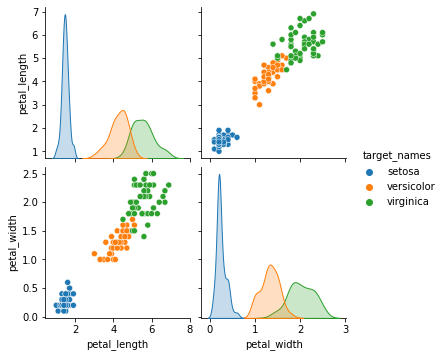

In [2]:
# Comparing petal length against petal width using pair plot
sns.pairplot(data[['petal_length','petal_width','target_names']], hue='target_names')


In [4]:
# Choosing only one type for the target
data = data[data['target_names']=='versicolor']
data.head()


,petal_length,petal_width,target,target_names
50,4.7,1.4,1,versicolor
51,4.5,1.5,1,versicolor
52,4.9,1.5,1,versicolor
53,4.0,1.3,1,versicolor
54,4.6,1.5,1,versicolor


In [5]:
# Dropping the "target_names" and "target" columns 
data.drop(columns=['target','target_names'], inplace=True)
print(data.shape)
data.head()

(50, 2)


,petal_length,petal_width
50,4.7,1.4
51,4.5,1.5
52,4.9,1.5
53,4.0,1.3
54,4.6,1.5


<AxesSubplot:xlabel='petal_length', ylabel='petal_width'>

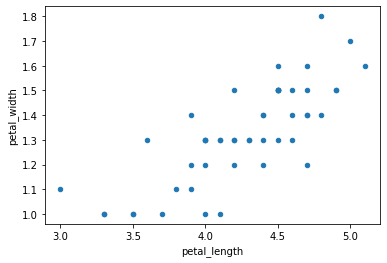

In [7]:
# Visualizing the 2 features using a scatter plot
data.plot(x='petal_length', y='petal_width',kind='scatter')



In [9]:
# Splitting the dataset into training and testing datasets
from sklearn.model_selection import train_test_split
X = data['petal_length'].values.reshape(-1,1)
y = data['petal_width'].values.reshape(-1,1)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.33, random_state=1)
print(data.shape)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

(50, 2)


((33, 1), (17, 1), (33, 1), (17, 1))

Text(0, 0.5, 'petal_width')

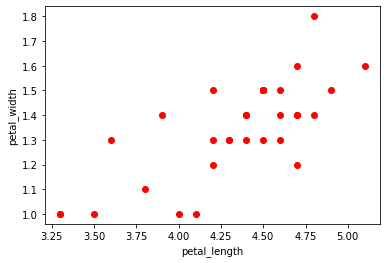

In [10]:
# visualizing the train data set for a scatter plot
plt.scatter(x=X_train, y=y_train, c='Red')
plt.xlabel('petal_length')
plt.ylabel('petal_width')


Text(0, 0.5, 'petal_width')

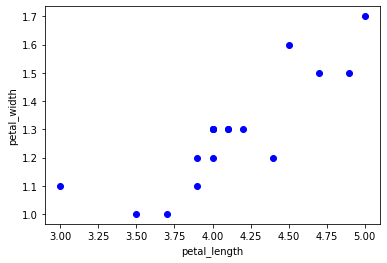

In [12]:
# visualizing the test data set for a scatter plot
plt.scatter(x=X_test,y=y_test,c='Blue')
plt.xlabel('petal_length')
plt.ylabel('petal_width')




In [13]:
# Train the model and find the intercept and coefficent values.
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)
print("Intercept: " + str(model.intercept_))
print("Co-ef:" + str(model.coef_))

Intercept: [-0.10228121]
Co-ef:[[0.3338594]]


Text(0, 0.5, 'petal_width(Pred)')

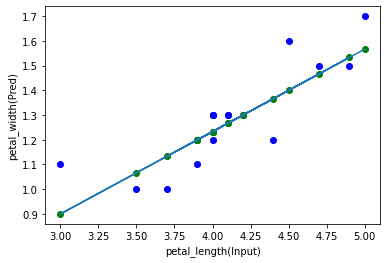

In [15]:
# Plotting the line over the points
y_pred = model.predict(X_test)
plt.scatter(x=X_test, y=y_test, c ='blue')
plt.plot(X_test,y_pred)
plt.scatter(x=X_test,y=y_pred,c='green',marker='o')
plt.xlabel("petal_length(Input)")
plt.ylabel("petal_width(Pred)")

In [16]:
# Looking at all the error metrics
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import mean_absolute_error
import numpy as np

print('Mean Absolute error: %.2f' % mean_absolute_error(y_test, y_pred))
# The mean squared error
print("Mean squared error: %.2f"% mean_squared_error(y_test, y_pred))
print("Root Mean squared error: %.2f"% np.sqrt(mean_squared_error(y_test,y_pred)))
# Explained variance score: 1 is perfect prediction
print('R square Score: %.2f' % r2_score(y_test,y_pred))





Mean Absolute error: 0.08
Mean squared error: 0.01
Root Mean squared error: 0.10
R square Score: 0.71
